In [11]:
using RxInfer, Random, Plots, GraphViz

In [12]:
rng = MersenneTwister(42)
n = 500
θ_real = 0.75
distribution = Bernoulli(θ_real)

dataset = float.(rand(rng, Bernoulli(θ_real), n));

In [13]:
# GraphPPL.jl export `@model` macro for model specification
# It accepts a regular Julia function and builds a factor graph under the hood
@model function coin_model(y, a, b)

    # We endow θ parameter of our model with "a" prior
    θ ~ Beta(a, b)
    # note that, in this particular case, the `Uniform(0.0, 1.0)` prior will also work.
    # θ ~ Uniform(0.0, 1.0)

    # here, the outcome of each coin toss is governed by the Bernoulli distribution
    for i in eachindex(y)
        y[i] ~ Bernoulli(θ)
    end

end

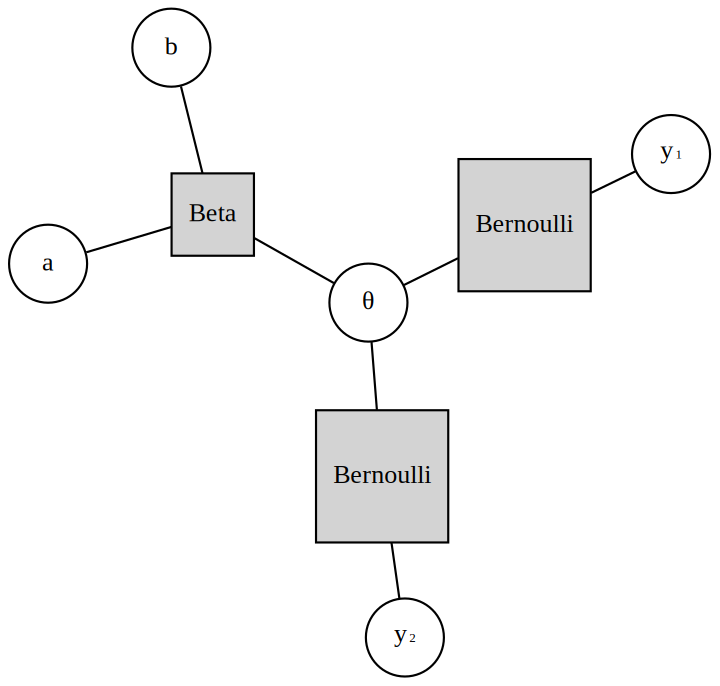

In [19]:
model_generator = coin_model() | (y = [1 ;1], a = 1.0, b = 1.0,)
model_to_plot   = RxInfer.getmodel(RxInfer.create_model(model_generator))
GraphViz.load(model_to_plot, strategy = :simple)